# Chapter 14 



In [18]:
!pip install -q scipy

# Image Processing Techniques II 



## Thresholding



Image segmentation is used to partition an image into different regions using foreground and background and very important in computer vision.

The thresholding function in opencv is define as: 

`cv2.threshold(src, thresh, maxval, type, dst=None) -> retval, dst`

`src`: image source  
`thresh`: value to assign  
`maxval`: maximum value allow (works only with cv2.THRESH_BINARY and cv2.THRESH_BINARY_INV)
`types`:   
- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV
- cv2.THRESH_OTSU
  - require single channel image 
- cv2.THRESH_TRIANGLE
  - require single channel image 

`retval`: return the `thresh` or `optimal thresh` value  
`dst`: return new image


### Thresholding images

Create a sample image with different boxes of grays (0, 50, 100, 150, 200, 250)

[ 50 100 150 200 250]


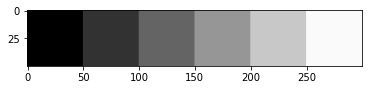

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# define tones
tones = np.arange(50, 300, 50)
print(tones)

# create image black of 50x50
main_img = np.zeros((50, 50, 3), dtype='uint8')

# build other images with different tones
# concatenate horizontally
for tone in tones:
    img = np.ones((50, 50, 3), dtype=np.uint8) * tone
    main_img = np.concatenate((main_img, img), axis=1)


plt.imshow(main_img)

plt.show()

Apply threshold.

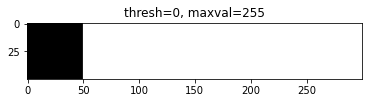

In [24]:
import cv2 as cv

ret, thresh_img = cv.threshold(main_img, 0, 255, cv.THRESH_BINARY)
plt.imshow(thresh_img)
plt.title('thresh=0, maxval=255')

plt.show()

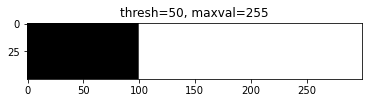

In [26]:
import cv2 as cv

thresh = 50
maxval = 255
ret, thresh_img = cv.threshold(main_img, thresh, maxval, cv.THRESH_BINARY)
plt.imshow(thresh_img)
plt.title(f'thresh={thresh}, maxval={maxval}')

plt.show()


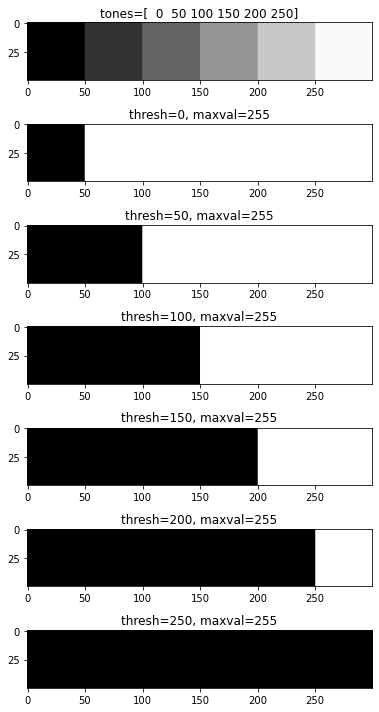

In [22]:
import cv2 as cv

maxval = 255
thresholds = np.arange(0, 300, 50)
nrows = len(thresholds) + 1
plt.figure(figsize=(8,10))

plt.subplot(nrows, 1, 1)
plt.imshow(main_img)
plt.title(f'tones={thresholds}')


for i, thresh in enumerate(thresholds):
    ret, thresh_img = cv.threshold(main_img, thresh, maxval, cv.THRESH_BINARY)
    plt.subplot(nrows, 1, i+2)
    plt.imshow(thresh_img)
    plt.title(f'thresh={thresh}, maxval={maxval}')

plt.tight_layout()
plt.show()

### Threshold Types

- cv2.THRESH_BINARY
  - assign `0` except if value is greater than `thresh`, then assign `maxval`
- cv2.THRESH_BINARY_INV
  - assign `maxval` except if value is greater than `thresh`, then assign `0`
- cv2.THRESH_TRUNC
  - assign `thresh` if value is greater than `thresh`
- cv2.THRESH_TOZERO
  - assign `0` if value is less or equal `thresh`
- cv2.THRESH_TOZERO_INV
  - assign `0` if value is greater than `thresh`

The below types use in combination with previous types, and computes the optimal threshold value.
- cv2.THRESH_OTSU
- cv2.THRESH_TRIANGLE
  


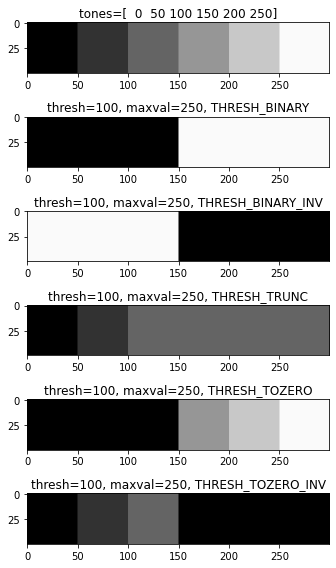

In [30]:
import cv2 as cv

thresh = 100
maxval = 250
plt.figure(figsize=(8,8))

plt.subplot(611)
plt.imshow(main_img)
plt.title(f'tones={thresholds}')

ret, thresh_img = cv.threshold(main_img, thresh, maxval, cv.THRESH_BINARY)
plt.subplot(612)
plt.imshow(thresh_img)
plt.title(f'thresh={thresh}, maxval={maxval}, THRESH_BINARY')

ret, thresh_img = cv.threshold(main_img, thresh, maxval, cv.THRESH_BINARY_INV)
plt.subplot(613)
plt.imshow(thresh_img)
plt.title(f'thresh={thresh}, maxval={maxval}, THRESH_BINARY_INV')

ret, thresh_img = cv.threshold(main_img, thresh, maxval, cv.THRESH_TRUNC)
plt.subplot(614)
plt.imshow(thresh_img)
plt.title(f'thresh={thresh}, maxval={maxval}, THRESH_TRUNC')

ret, thresh_img = cv.threshold(main_img, thresh, maxval, cv.THRESH_TOZERO)
plt.subplot(615)
plt.imshow(thresh_img)
plt.title(f'thresh={thresh}, maxval={maxval}, THRESH_TOZERO')

ret, thresh_img = cv.threshold(main_img, thresh, maxval, cv.THRESH_TOZERO_INV)
plt.subplot(616)
plt.imshow(thresh_img)
plt.title(f'thresh={thresh}, maxval={maxval}, THRESH_TOZERO_INV')

plt.tight_layout()
plt.show()

### Apply Threshold to a real image

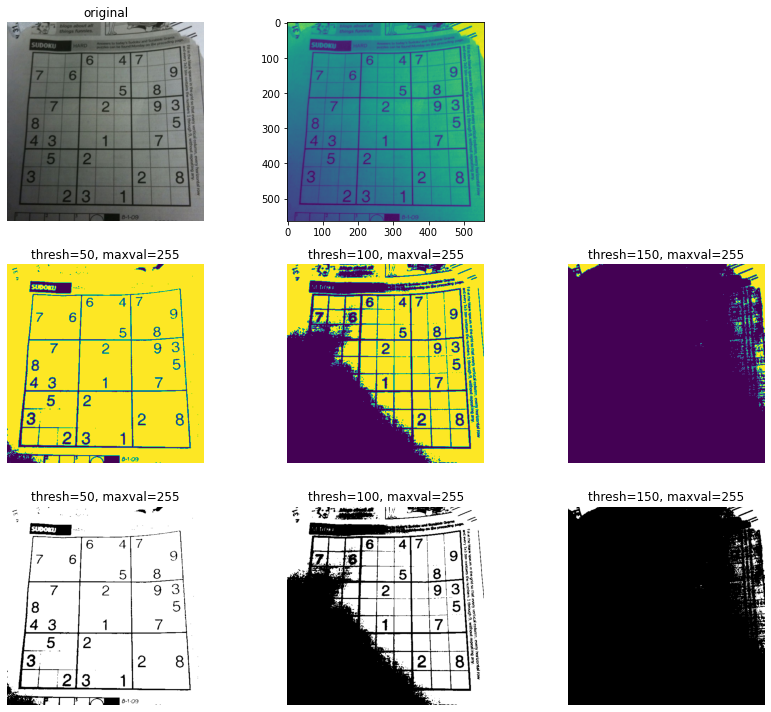

In [22]:
import cv2 as cv
import matplotlib.pyplot as plt

imgPath = '../samples/data/sudoku.png'
img = cv.imread(imgPath)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(12,10))

# BGR to RGB
plt.subplot(331)
img = img[:, :, ::-1]
plt.imshow(img)
plt.title('original')
plt.axis('off')

# BGR to RGB
plt.subplot(332)
plt.imshow(img_gray)

# threshold [50, 100, 150]
thresh = 50
maxval = 255
ret, thresh_img = cv.threshold(img_gray, thresh, maxval, cv.THRESH_BINARY)
plt.subplot(334)
plt.imshow(thresh_img)
plt.title(f'thresh={thresh}, maxval={maxval}')
plt.axis('off')
# gray to BGR
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2BGR)
# BGR to RGB
thresh_img = thresh_img[:, :, ::-1]
plt.subplot(337)
plt.imshow(thresh_img)
plt.title(f'thresh={thresh}, maxval={maxval}')
plt.axis('off')

thresh = 100
# maxval = 255
ret, thresh_img = cv.threshold(img_gray, thresh, maxval, cv.THRESH_BINARY)
plt.subplot(335)
plt.imshow(thresh_img)
plt.title(f'thresh={thresh}, maxval={maxval}')
plt.axis('off')
# gray to BGR
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2BGR)
# BGR to RGB
thresh_img = thresh_img[:, :, ::-1]
plt.subplot(338)
plt.imshow(thresh_img)
plt.title(f'thresh={thresh}, maxval={maxval}')
plt.axis('off')

thresh = 150
# maxval = 255
ret, thresh_img = cv.threshold(img_gray, thresh, maxval, cv.THRESH_BINARY)
plt.subplot(336)
plt.imshow(thresh_img)
plt.title(f'thresh={thresh}, maxval={maxval}')
plt.axis('off')
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(339)
plt.imshow(thresh_img)
plt.title(f'thresh={thresh}, maxval={maxval}')
plt.axis('off')

plt.tight_layout()

plt.show()


### Adaptive Thresholding

Adaptive thresholding can make your image clearer but will add or increase a lot of noise.

`adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst`  

`src`: single channel 8 bit image.  
`maxValue`: maximum assignable value.   
`adaptiveMethod`: 
- cv2.ADAPTIVE_THRESH_MEAN_C: The T(x, y) threshold value is calculated as
the mean of the blockSize x blockSize neighborhood of (x, y) minus
the C parameter
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C: The T(x, y) threshold value is
calculated as the weighted sum of the blockSize x blockSize neighborhood
of (x, y) minus the C parameter

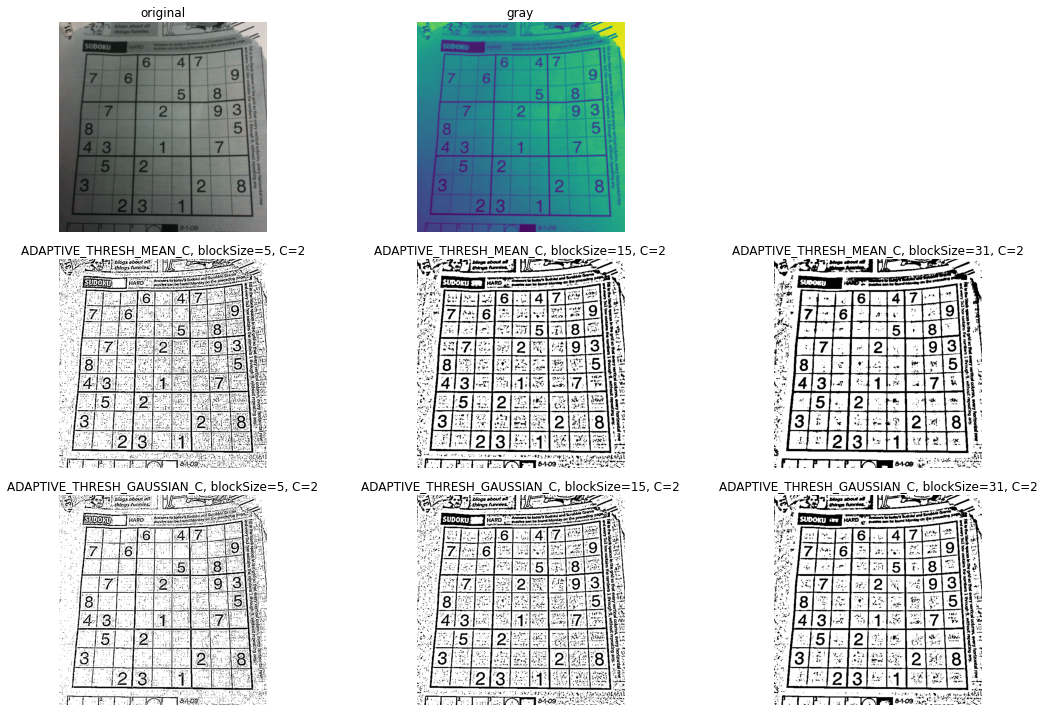

In [30]:
import cv2 as cv
import matplotlib.pyplot as plt

imgPath = '../samples/data/sudoku.png'
img = cv.imread(imgPath)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(15,10))

# original
plt.subplot(331)
plt.imshow(img)
plt.title('original')
plt.axis('off')

plt.subplot(332)
plt.imshow(img_gray)
plt.title('gray')
plt.axis('off')

# 
maxval = 255
blockSize = 5
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(334)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_MEAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

blockSize = 15
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(335)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_MEAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

blockSize = 31
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(336)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_MEAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

blockSize = 5
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(337)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_GAUSSIAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

blockSize = 15
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(338)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_GAUSSIAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

blockSize = 31
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(339)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_GAUSSIAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')


plt.tight_layout()

plt.show()

Applying a noise removal before adaptive thresholding.

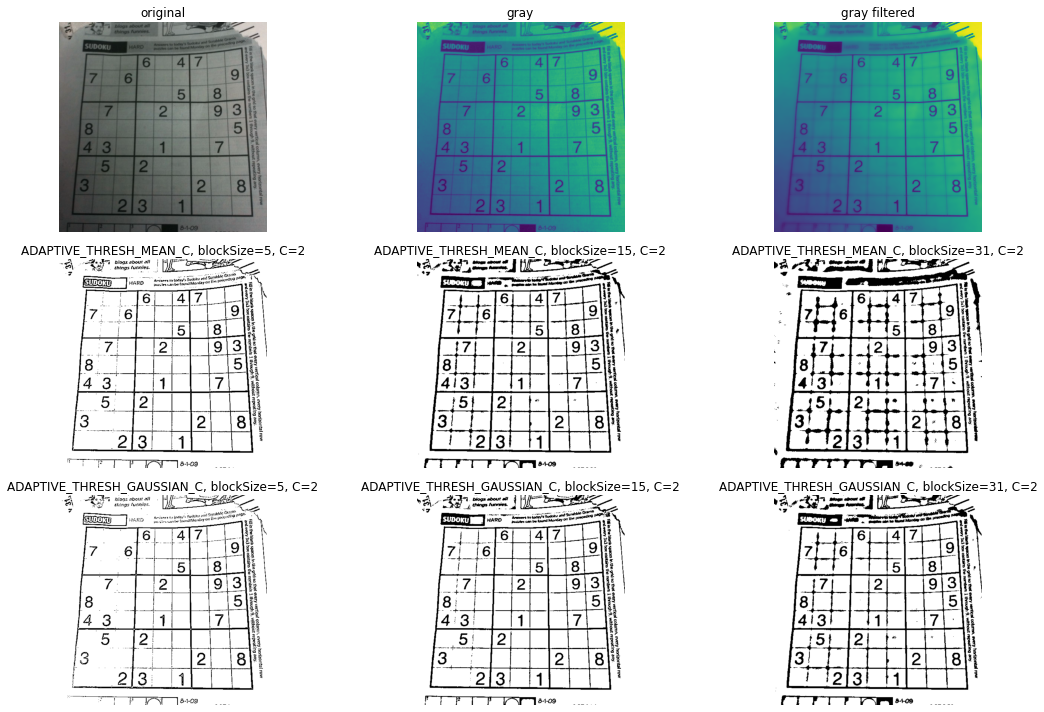

In [32]:
import cv2 as cv
import matplotlib.pyplot as plt

imgPath = '../samples/data/sudoku.png'
img = cv.imread(imgPath)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(15,10))

# original
plt.subplot(331)
plt.imshow(img)
plt.title('original')
plt.axis('off')

plt.subplot(332)
plt.imshow(img_gray)
plt.title('gray')
plt.axis('off')

# filtered gray
img_gray = cv.bilateralFilter(img_gray, 15, 25, 25)
plt.subplot(333)
plt.imshow(img_gray)
plt.title('gray filtered')
plt.axis('off')

# 
maxval = 255
blockSize = 5
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(334)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_MEAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

blockSize = 15
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(335)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_MEAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

blockSize = 31
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(336)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_MEAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

blockSize = 5
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(337)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_GAUSSIAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

blockSize = 15
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(338)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_GAUSSIAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

blockSize = 31
C = 2
thresh_img = cv.adaptiveThreshold(img_gray, maxval, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, blockSize=blockSize, C=C)
# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(339)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_GAUSSIAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')


plt.tight_layout()

plt.show()

### Otsu's Thresholding Algorithm

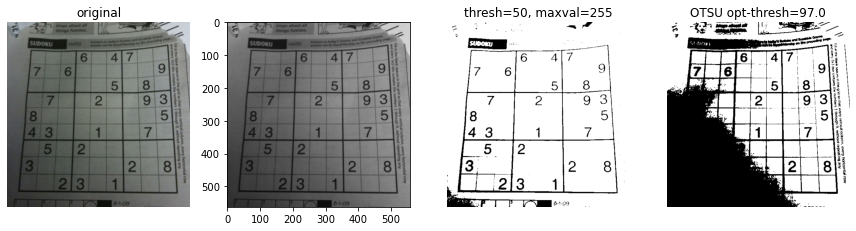

In [38]:
import cv2 as cv
import matplotlib.pyplot as plt

imgPath = '../samples/data/sudoku.png'
img = cv.imread(imgPath)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(12,10))

# BGR to RGB
plt.subplot(141)
img = img[:, :, ::-1]
plt.imshow(img)
plt.title('original')
plt.axis('off')

# BGR to RGB
plt.subplot(142)
# gray to BGR
thresh_img = cv.cvtColor(img_gray, cv.COLOR_GRAY2BGR)
plt.imshow(thresh_img)

# threshold [50, 100, 150]
thresh = 50
maxval = 255
ret, thresh_img = cv.threshold(img_gray, thresh, maxval, cv.THRESH_BINARY)
# gray to BGR
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2BGR)
# BGR to RGB
thresh_img = thresh_img[:, :, ::-1]
plt.subplot(143)
plt.imshow(thresh_img)
plt.title(f'thresh={thresh}, maxval={maxval}')
plt.axis('off')

# otsu
ret, thresh_img = cv.threshold(img_gray, 0, maxval, cv.THRESH_BINARY + cv.THRESH_OTSU)
# gray to BGR
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2BGR)
# BGR to RGB
thresh_img = thresh_img[:, :, ::-1]
plt.subplot(144)
plt.imshow(thresh_img)
plt.title(f'OTSU opt-thresh={ret}')
plt.axis('off')


plt.tight_layout()

plt.show()


## Contour Detection 



## Filtering  



## Drawing

